In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 251212


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test_202509/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/oryza_sativa_random_gene_list.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_hit_species_togoid_convert.tsv")

In [4]:
# Parameters
foldseek_result_tsv = "/tmp/gzcvb64t/stg1f2461a4-e083-43b4-ab5b-70981de8fc57/foldseek_os_100genes_9606_permissive.tsv"
query_uniprot_idmapping_tsv = "/tmp/gzcvb64t/stg5ad8eeea-da27-435f-b2d4-8dd11141ade3/os_100_genes_idmapping_all.tsv"
water_result_dir_path = "/tmp/gzcvb64t/stg21c91195-7c78-4fa5-ba97-19dfde16f8dc/result_water"
needle_result_dir_path = "/tmp/gzcvb64t/stg8016f12d-91b7-4d7d-8b85-a9ea4faed9c1/result_needle"
query_gene_list_tsv_path = "/tmp/gzcvb64t/stg89392eb1-dd7d-46ec-bf2f-feb9ec205ce9/oryza_sativa_random_100genes_list.tsv"
togoid_convert_tsv_path = "/tmp/gzcvb64t/stga58e7a78-8704-4663-ad5e-378af511ea7c/foldseek_hit_species_togoid_convert_permissive.tsv"


In [5]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
).with_columns(
    (pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession")), # "?" means non-greedy
    (pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit"))
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str
"""Os10g0525500""","""Q7G228""","""O43708""",0.000005,1.0,4,31.0,0.31,32,15,112,144,5,101,216,103,0.681,0.449,0.721,0.5875,0.3992,0.3992,1.91,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""AVRVLGSWTSPFVMRVVVALKLKGVEEYEL…","""KPILYSYFRSSCSWRVRIALALKGI-DYKT…",60,"""0.528,0.774,0.746,0.774,0.802,…"
"""Os10g0525500""","""Q7G228""","""P78417-2""",0.000009,1.0,5,30.0,0.3,33,4,112,144,13,115,208,110,0.757,0.495,0.7471,0.6144,0.4329,0.4329,4.724,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""SSTSGSAEPAAAVRVLGSWTSPFVMRVVVA…","""SAPPGPVPEGS-IRIYSMRFCPFAERTRLV…",69,"""0.562,0.611,0.667,0.806,0.833,…"
"""Os10g0525500""","""Q7G228""","""Q9H4Y5""",0.000011,1.0,5,25.8,0.258,31,5,123,144,13,125,243,120,0.826,0.465,0.7468,0.6707,0.4097,0.4097,3.974,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""STSGSAEPAAAVRVLGSWTSPFVMRVVVAL…","""SQPPGPVPEGLIRIYSMRFCPYSHRTRLVL…",81,"""0.472,0.583,0.750,0.750,0.750,…"
"""Os10g0525500""","""Q7G228""","""P78417""",0.000006,1.0,6,25.5,0.255,35,4,139,144,13,140,241,137,0.944,0.531,0.7298,0.71,0.4411,0.4411,5.247,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""SSTSGSAEPAAAVRVLGSWTSPFVMRVVVA…","""SAPPGPVPEGS-IRIYSMRFCPFAERTRLV…",92,"""0.531,0.611,0.667,0.778,0.861,…"
"""Os10g0525500""","""Q7G228""","""Q9H4Y5-2""",0.00002,1.0,5,25.2,0.252,29,4,117,144,13,120,209,115,0.792,0.517,0.751,0.6357,0.4475,0.4475,4.654,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""SSTSGSAEPAAAVRVLGSWTSPFVMRVVVA…","""SQPPGPVPEGL-IRIYSMRFCPYSHRTRLV…",78,"""0.562,0.611,0.694,0.806,0.833,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os09g0249000""","""Q0J381""","""Q8WYP5-3""",0.06074,0.411,32,11.5,0.115,40,20,315,332,43,300,2275,346,0.892,0.113,0.2624,0.296,0.06713,0.06713,10.52,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""ARSSHAITLVGGTAYAFGGEFTPRVPVDNA…","""LRGKFAA-GKNGLACL--------AC-GPQ…",168,"""0.102,0.153,0.128,0.141,0.129,…"
"""Os09g0249000""","""Q0J381""","""Q86TI2-2""",0.04041,0.277,34,10.1,0.101,38,21,314,332,168,475,892,376,0.886,0.345,0.2483,0.2372,0.1177,0.1177,16.53,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""RSSHAITLVGGTAYAFGGEFTPRVPVDNAM…","""ITSYDFHSESGLFLFQAS---------NSL…",188,"""0.131,0.107,0.120,0.154,0.196,…"
"""Os09g0249000""","""Q0J381""","""Q9P2L0""",0.04474,0.277,27,8.4,0.084,33,20,325,332,116,426,1181,391,0.922,0.263,0.2621,0.2238,0.08373,0.08373,21.54,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""ARSSHAITLV--GGTAYAFGGEFTPRVPVD…","""SVVR-SMSWNADGQKICI--------VYED…",193,"""0.140,0.190,0.095,0.104,0.287,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

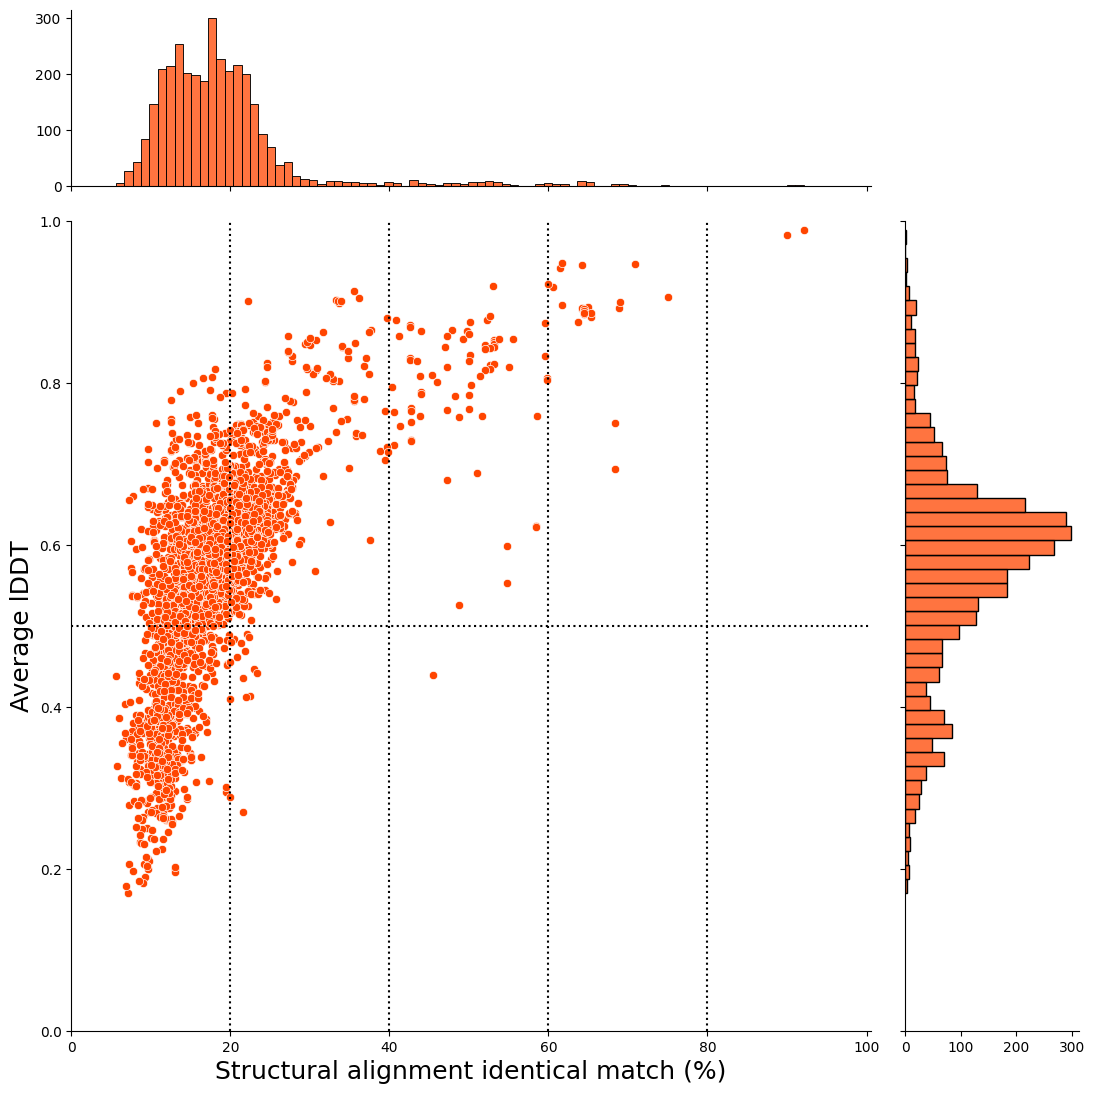

In [6]:
foldseek_filter_viz = foldseek_result.to_pandas()
sns.jointplot(
    data=foldseek_filter_viz,
    x="pident", # structural alignment identical match from foldseek result
    y="lddt",
    color="orangered",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Structural alignment identical match (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [7]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [8]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0N7KTX9""","""P45844-2""",297,"""69/297""",23.2,"""138/297""",46.5,"""26/297""",8.8,212.0
"""A0A0N7KTX9""","""P45844-3""",297,"""69/297""",23.2,"""138/297""",46.5,"""26/297""",8.8,212.0
"""A0A0N7KTX9""","""P45844-4""",297,"""69/297""",23.2,"""138/297""",46.5,"""26/297""",8.8,212.0
"""A0A0N7KTX9""","""P45844-5""",297,"""69/297""",23.2,"""138/297""",46.5,"""26/297""",8.8,212.0
"""A0A0N7KTX9""","""P45844-6""",297,"""69/297""",23.2,"""138/297""",46.5,"""26/297""",8.8,212.0
…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q96A08""",102,"""73/102""",71.6,"""91/102""",89.2,"""0/102""",0.0,383.0
"""Q9LGI2""","""Q99877""",141,"""84/141""",59.6,"""106/141""",75.2,"""18/141""",12.8,413.5
"""Q9LGI2""","""Q99879""",141,"""83/141""",58.9,"""104/141""",73.8,"""18/141""",12.8,409.5


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0N7KTX9""","""P45844-2""",709,"""73/709""",10.3,"""148/709""",20.9,"""414/709""",58.4,204.0
"""A0A0N7KTX9""","""P45844-3""",700,"""73/700""",10.4,"""148/700""",21.1,"""405/700""",57.9,204.0
"""A0A0N7KTX9""","""P45844-4""",698,"""73/698""",10.5,"""148/698""",21.2,"""403/698""",57.7,204.0
"""A0A0N7KTX9""","""P45844-5""",695,"""73/695""",10.5,"""148/695""",21.3,"""400/695""",57.6,204.0
"""A0A0N7KTX9""","""P45844-6""",694,"""73/694""",10.5,"""148/694""",21.3,"""399/694""",57.5,204.0
…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q96A08""",154,"""81/154""",52.6,"""102/154""",66.2,"""28/154""",18.2,381.0
"""Q9LGI2""","""Q99877""",154,"""84/154""",54.5,"""106/154""",68.8,"""29/154""",18.8,411.5
"""Q9LGI2""","""Q99879""",154,"""83/154""",53.9,"""104/154""",67.5,"""29/154""",18.8,407.5


In [9]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A0N7KTX9""","""P45844-2""",297,709,"""69/297""","""73/709""",23.2,10.3,46.5,20.9,"""26/297""","""414/709""",8.8,58.4,212.0,204.0
"""A0A0N7KTX9""","""P45844-3""",297,700,"""69/297""","""73/700""",23.2,10.4,46.5,21.1,"""26/297""","""405/700""",8.8,57.9,212.0,204.0
"""A0A0N7KTX9""","""P45844-4""",297,698,"""69/297""","""73/698""",23.2,10.5,46.5,21.2,"""26/297""","""403/698""",8.8,57.7,212.0,204.0
"""A0A0N7KTX9""","""P45844-5""",297,695,"""69/297""","""73/695""",23.2,10.5,46.5,21.3,"""26/297""","""400/695""",8.8,57.6,212.0,204.0
"""A0A0N7KTX9""","""P45844-6""",297,694,"""69/297""","""73/694""",23.2,10.5,46.5,21.3,"""26/297""","""399/694""",8.8,57.5,212.0,204.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q9LGI2""","""Q96A08""",102,154,"""73/102""","""81/154""",71.6,52.6,89.2,66.2,"""0/102""","""28/154""",0.0,18.2,383.0,381.0
"""Q9LGI2""","""Q99877""",141,154,"""84/141""","""84/154""",59.6,54.5,75.2,68.8,"""18/141""","""29/154""",12.8,18.8,413.5,411.5
"""Q9LGI2""","""Q99879""",141,154,"""83/141""","""83/154""",58.9,53.9,73.8,67.5,"""18/141""","""29/154""",12.8,18.8,409.5,407.5


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [10]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (3_295, 44)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ Q0D554      ┆ O14617-3   ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q10KW4      ┆ Q5VU57     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q10T57      ┆ Q04656-3   ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ A0A0P0WDT6  ┆ Q6VVX0     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os07g0581300""","""Q0D554""","""O14617-3""",0.02181,0.353,10,13.9,0.139,29,1,198,658,691,860,984,208,0.301,0.173,0.3342,0.09511,0.06894,0.06894,21.43,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""MESGQPNSAAAADKTQNSSVPPVEGVAGGG…","""KKKEKEKKKSPKPKKKKHRKEKEERTKGKK…",131,"""0.938,0.950,0.958,1.000,0.906,…",255,1558,"""51/255""","""25/1558""",20.0,1.6,33.7,2.8,"""79/255""","""1474/1558""",31.0,94.6,52.0,14.5
"""Os03g0367900""","""Q10KW4""","""Q5VU57""",0.01184,0.923,16,10.3,0.103,27,4,215,222,216,433,503,262,0.955,0.433,0.3828,0.4597,0.2318,0.2318,9.133,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""EGPSGVTVHVTGFKKFHGVAENPTEKIVRN…","""EGAEQKVVFITG-------RVHPGETPSSF…",141,"""0.425,0.365,0.316,0.360,0.447,…",27,647,"""8/27""","""18/647""",29.6,2.8,48.1,5.6,"""0/27""","""569/647""",0.0,87.9,32.0,17.0
"""Os03g0100800""","""Q10T57""","""Q04656-3""",8.9990e-27,1.0,33,17.3,0.173,142,2,703,970,739,1486,1581,820,0.724,0.473,0.5545,0.4159,0.2717,0.2717,23.16,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""LMEVANAMDAITKETVDLEHIPVEEVLDHL…","""LFFCIPVMGLMIYMMV-MDH--HFATLHHN…",488,"""0.429,0.421,0.440,0.336,0.417,…",764,1923,"""164/764""","""185/1923""",21.5,9.6,36.4,16.2,"""197/764""","""1295/1923""",25.8,67.3,368.0,346.5
"""Os04g0560100""","""A0A0P0WDT6""","""Q6VVX0""",5.1670e-20,1.0,24,17.8,0.178,100,2,519,545,1,501,501,561,0.95,1.0,0.6089,0.6931,0.749,0.749,6.969,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""EAGTWAVVVAAVAAYMAWFWRMSRG-----…","""MWKLWRAEEGAAALGGALFLLLFALGVRQL…",358,"""0.875,0.909,0.917,0.923,0.911,…",536,627,"""124/536""","""133/627""",23.1,21.2,38.4,34.4,"""138/536""","""208/627""",25.7,33.2,237.5,230.0
"""Os01g0810800""","""B7FAC9""","""Q9UQ88-3""",2.2320e-14,1.0,21,18.2,0.182,79,569,935,937,365,774,779,432,0.392,0.526,0.5446,0.2375,0.2827,0.2827,24.45,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""KGKSRKSEEEDYDMYEEETPLH-----IDI…","""SGESEEAEEEVGEGTPQSSALTEGDYVPDS…",266,"""0.250,0.417,0.545,0.568,0.778,…",306,1177,"""75/306""","""153/1177""",24.5,13.0,43.8,23.2,"""78/306""","""638/1177""",25.5,54.2,179.5,74.0


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Create Scatter Plot for all hits (x-axis: Similarity_percent_needle) Global alignment

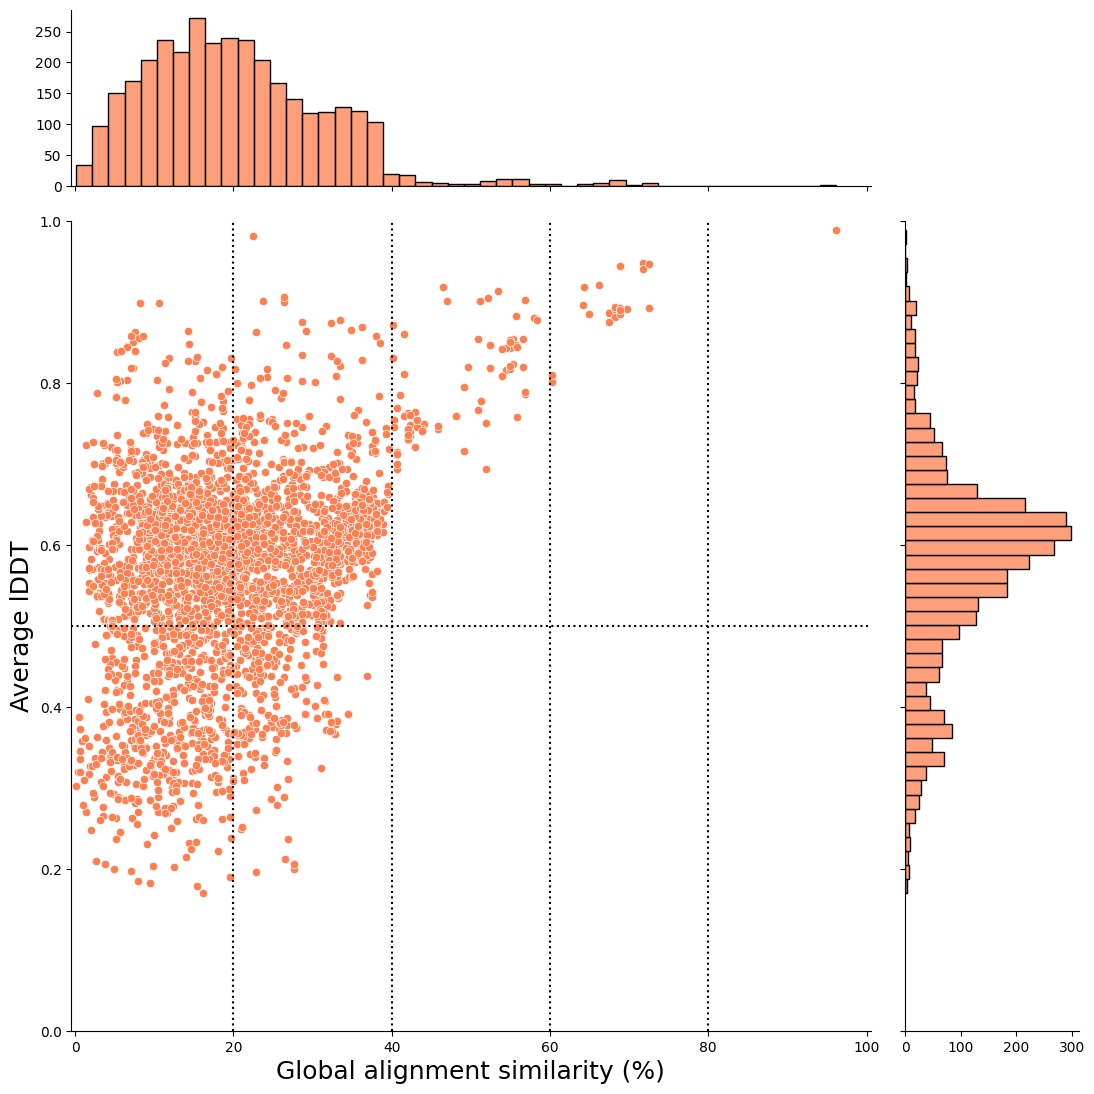

In [11]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;


## Create Scatter Plot for all hits (x-axis: Similarity_percent_water) Local Alignment

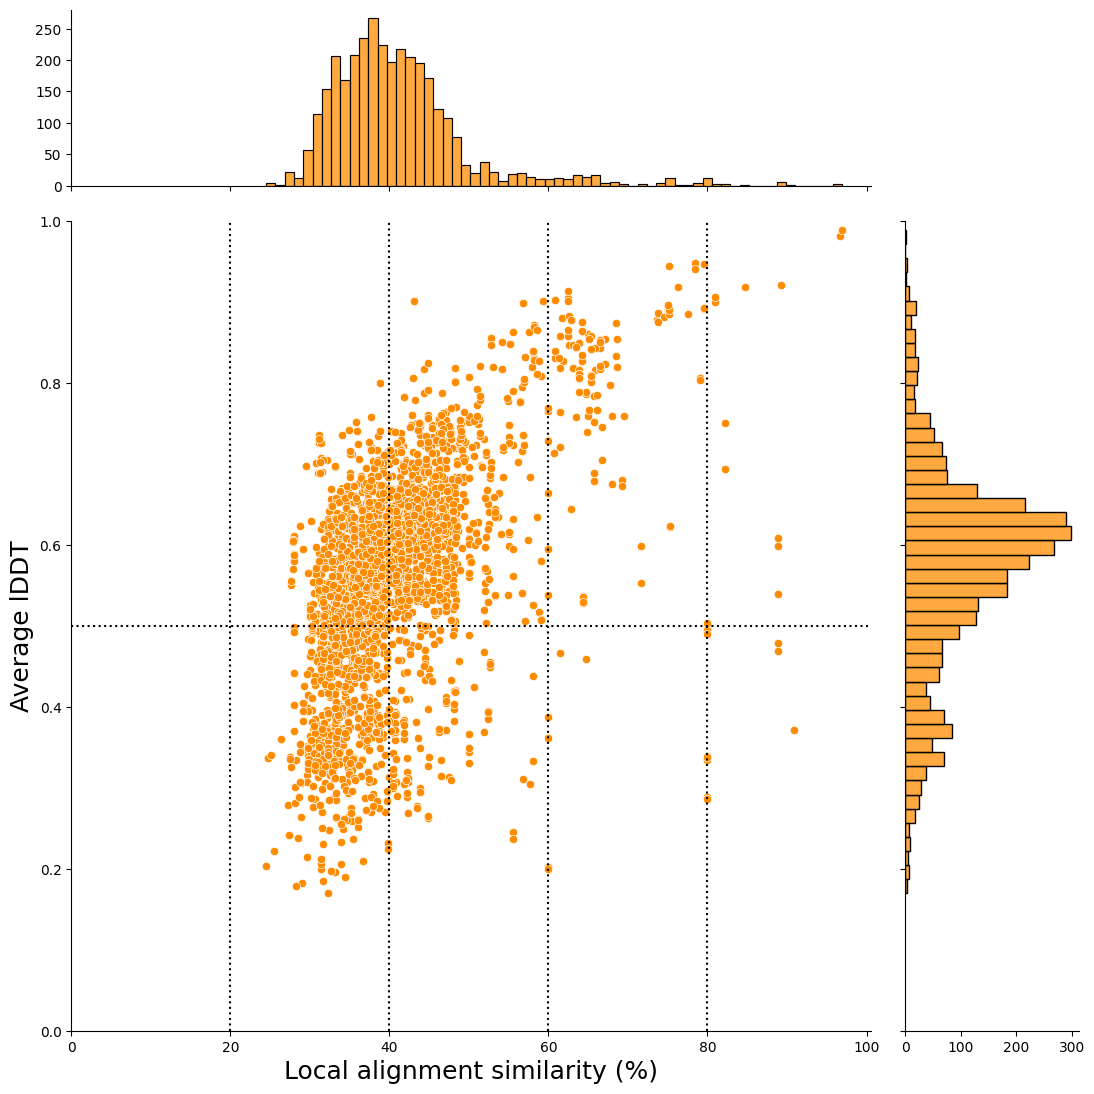

In [12]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_water", # local alignment similarity
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Counting foldseek hits in Gene level

In [13]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Os03g0638800""",522,false
"""Os09g0568400""",389,false
"""Os01g0924300""",334,false
"""Os03g0100800""",253,false
"""Os01g0810800""",252,false
…,…,…
"""Os02g0816000""",0,true
"""Os02g0700350""",0,true
"""Os07g0216600""",0,true


&nbsp;

&nbsp;

&nbsp;

# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- alignment coverage >= 0.5

In [14]:
condition1 = join_foldseek.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).sort(
        by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession
        descending=[False, False, False]
    )

condition1_rm = condition1.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition1.group_by(["From"], maintain_order=True).n_unique())
display(condition1)

shape: (30, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01048 ┆ 2          ┆ 3         ┆ 5      ┆ … ┆ 3         ┆ 3         ┆ 3         ┆ 3         │
│ 00         ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Os01g01523 ┆ 1          ┆ 36        ┆ 33     ┆ … ┆ 18        ┆ 21        

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os01g0104800""","""Q657Z6""","""A6NGG8""",0.03154,0.082,34,14.4,0.144,111,4,645,645,16,661,1288,769,0.995,0.502,0.5304,0.0662,0.04212,0.04212,58.82,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""EKGKGKWKRPPTVKPPVMAASASDDDEIDA…","""KSGIQFLKKPKAIRPGCQGGSERG------…",408,"""0.429,0.531,0.625,0.750,0.875,…",616,1386,"""111/616""","""139/1386""",18.0,10.0,33.0,18.3,"""181/616""","""839/1386""",29.4,60.5,98.5,75.5
"""Os01g0104800""","""Q658C6""","""A6NGG8""",0.02788,0.138,30,13.7,0.137,103,4,645,645,16,661,1288,755,0.995,0.502,0.5369,0.09499,0.05791,0.05791,55.22,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""EKGKGKWKRPPTVKPPVMAASASDDDEIDA…","""KSGIQFLKKPKAIRPGCQGGSE--------…",430,"""0.571,0.562,0.719,0.844,0.969,…",616,1386,"""111/616""","""139/1386""",18.0,10.0,33.0,18.3,"""181/616""","""839/1386""",29.4,60.5,98.5,75.5
"""Os01g0104800""","""Q657Z6""","""Q96PX6""",0.07366,0.063,20,14.8,0.148,87,169,645,645,1,508,553,586,0.74,0.919,0.5506,0.05682,0.06383,0.06383,64.92,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""EDGESDEEDRAIKASNHQVKVPDGEHS---…","""MSKAAGGAAAAAAAAESCSPAPAGSSAAPP…",312,"""0.288,0.417,0.455,0.694,0.722,…",496,768,"""94/496""","""111/768""",19.0,14.5,32.9,25.0,"""148/496""","""338/768""",29.8,44.0,71.5,56.5
"""Os01g0104800""","""Q658C6""","""Q96PX6""",0.04261,0.076,18,14.0,0.14,82,168,645,645,4,508,553,584,0.741,0.913,0.5575,0.05748,0.06479,0.06479,68.24,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""LEDGESDEEDRAIKASNHQVKVPDGEHSFE…","""AAGGAAAAAAAAESCSPAPAGSSAAPPAPV…",317,"""0.271,0.292,0.385,0.521,0.583,…",496,768,"""94/496""","""111/768""",19.0,14.5,32.9,25.0,"""148/496""","""338/768""",29.8,44.0,71.5,56.5
"""Os01g0104800""","""Q657Z6""","""Q9Y2H5""",0.0356,0.138,24,11.5,0.115,84,1,626,645,354,974,1048,733,0.971,0.593,0.6024,0.09045,0.05792,0.05792,57.59,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""MGKEKGKGKWKRPPTVKPPVMAASASDDDE…","""YSSQYPDDYQYYPPGVRPESICSMPAYD--…",430,"""1.000,0.950,0.958,1.000,0.906,…",631,1233,"""109/631""","""119/1233""",17.3,9.7,33.4,18.9,"""221/631""","""773/1233""",35.0,62.7,95.0,85.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0""",1.3570e-38,1.0,17,28.4,0.284,185,73,692,713,2,646,655,653,0.87,0.985,0.7544,0.7535,0.8154,0.8154,5.638,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""TFDGVEVPLPAAQAVSLPRAAADVVD----…","""SSSNVEVFIPVSQGNTNGFPATASNDLKAF…",427,"""0.469,0.562,0.719,0.875,1.000,…",667,764,"""209/667""","""209/764""",31.3,27.4,48.9,43.2,"""77/667""","""160/764""",11.5,20.9,696.5,687.5
"""Os12g0411700""","""Q2QT07""","""Q9UNQ0""",1.7070e-37,1.0,19,28.7,0.287,187,73,692,713,2,646,655,653,0.87,0.985,0.7453,0.7522,0.8149,0.8149,6.221,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""TFDGVEVPLPAAQAVS--LPRAAADV--VD…","""SSSNVEVFIPVSQGNTNGFPATASNDLKAF…",425,"""0.438,0.562,0.750,0.812,0.850,…",667,764,"""209/667""","""209/764""",31.3,27.4,48.9,43.2,"""77/667""","""160/764""",11.5,20.9,696.5,687.5
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0-2""",7.3310e-35,1.0,15,29.9,0.299,173,73,621,713,2,571,611,578,0.77,0.933,0.7142,0.6573,0.76,0.76,6.191,9606,"""Homo sapiens""","""-_cellular organisms;-_Eukaryo…","""TFDGVEVPLPAAQAVSLPRAAADVVD----…","""SSSNVEVFIPVSQGNTNGFPATASNDLKAF…",368,"

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Filtering Condition2

- If there are hits with the same target for the same gene-derived UniProt ID, the one with the highest qcov is selected, and if the qcov is the same, the one with the highest lDDT is selected.
- **Note that in this study, we leave the states with the same foldseek hit even if the rice genes are different.**

In [15]:
condition2 = condition1.sort(
    by=["qcov", "lddt"],
    descending=[True, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    pl.all().first()
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False]
).select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "evalue",
    "prob",
    "gapopen",
    "pident",
    "fident",
    "nident",
    "qstart",
    "qend",
    "qlen",
    "tstart",
    "tend",
    "tlen",
    "alnlen",
    "qcov",
    "tcov",
    "lddt",
    "qtmscore",
    "ttmscore",
    "alntmscore",
    "rmsd",
    "taxid",
    "taxname",
    "mismatch",
    "Length_water",
    "Length_needle",
    "Identity_water",
    "Identity_needle",
    "Identity_percent_water",
    "Identity_percent_needle",
    "Similarity_percent_water",
    "Similarity_percent_needle",
    "Gaps_water",
    "Gaps_percent_water",
    "Gaps_needle",
    "Gaps_percent_needle",
    "Score_water",
    "Score_needle"
)

display(condition2)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,mismatch,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,i64,i64,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Os01g0104800""","""Q657Z6""","""Q9Y2H5""",0.0356,0.138,24,11.5,0.115,84,1,626,645,354,974,1048,733,0.971,0.593,0.6024,0.09045,0.05792,0.05792,57.59,9606,"""Homo sapiens""",430,631,1233,"""109/631""","""119/1233""",17.3,9.7,33.4,18.9,"""221/631""",35.0,"""773/1233""",62.7,95.0,85.5
"""Os01g0104800""","""Q658C6""","""A6NGG8""",0.02788,0.138,30,13.7,0.137,103,4,645,645,16,661,1288,755,0.995,0.502,0.5369,0.09499,0.05791,0.05791,55.22,9606,"""Homo sapiens""",430,616,1386,"""111/616""","""139/1386""",18.0,10.0,33.0,18.3,"""181/616""",29.4,"""839/1386""",60.5,98.5,75.5
"""Os01g0104800""","""Q658C6""","""Q96PX6""",0.04261,0.076,18,14.0,0.14,82,168,645,645,4,508,553,584,0.741,0.913,0.5575,0.05748,0.06479,0.06479,68.24,9606,"""Homo sapiens""",317,496,768,"""94/496""","""111/768""",19.0,14.5,32.9,25.0,"""148/496""",29.8,"""338/768""",44.0,71.5,56.5
"""Os01g0152300""","""Q9LGI2""","""A0A2R8Y619""",2.1100e-13,1.0,2,60.6,0.606,74,31,152,153,2,120,122,122,0.797,0.975,0.9188,0.6446,0.7994,0.7994,5.994,9606,"""Homo sapiens""",45,118,157,"""76/118""","""78/157""",64.4,49.7,84.7,64.3,"""3/118""",2.5,"""39/157""",24.8,391.0,385.0
"""Os01g0152300""","""Q9LGI2""","""O60814""",3.0700e-13,1.0,2,65.3,0.653,81,33,152,153,2,124,126,124,0.784,0.976,0.8851,0.5609,0.6772,0.6772,18.02,9606,"""Homo sapiens""",38,141,154,"""86/141""","""86/154""",61.0,55.8,75.2,68.8,"""18/141""",12.8,"""29/154""",18.8,419.5,417.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q2QT07""","""P45844-6""",4.7720e-36,1.0,22,24.6,0.246,171,54,706,713,2,660,662,697,0.916,0.995,0.7393,0.7397,0.7941,0.7941,13.98,9606,"""Homo sapiens""",444,665,781,"""190/665""","""192/781""",28.6,24.6,49.0,42.1,"""77/665""",11.6,"""187/781""",23.9,650.5,634.0
"""Os12g0411700""","""Q2QT07""","""Q9H172""",1.8940e-34,1.0,20,23.0,0.23,158,54,701,713,4,645,646,689,0.909,0.994,0.7436,0.7327,0.805,0.805,9.327,9606,"""Homo sapiens""",443,668,769,"""178/668""","""184/769""",26.6,23.9,46.7,42.1,"""101/668""",15.1,"""179/769""",23.3,578.5,575.0
"""Os12g0411700""","""Q2QT07""","""Q9H221-2""",8.6070e-35,1.0,22,22.0,0.22,151,54,692,713,1,659,672,688,0.896,0.981,0.7134,0.7338,0.7764,0.7764,13.81,9606,"""Homo sapiens""",459,605,788,"""162/605""","""177/788""",26.8,22.5,45.8,37.9,"""57/605""",9.4,"""191/788""",24.2,547.0,530.0


&nbsp;

&nbsp;

&nbsp;

## Filtering Condition3

- Select hits that can be converted to Ensembl gene id and HGNC Gene nomenclature with TogoID API
- https://togoid.dbcls.jp/

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).sort(
    by=["foldseek hit"],
    descending=[False]
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A075B759""","""ENSP00000463419""","""ENST00000581164""","""ENSG00000271567""",33997,"""PPIAL4E"""
"""A0A075B767""","""ENSP00000464619""","""ENST00000584068""","""ENSG00000270339""",53889,"""PPIAL4H"""
"""A0A0B4J2A2""","""ENSP00000463057""","""ENST00000585245""","""ENSG00000288867""",33995,"""PPIAL4C"""
"""A0A1W2PR19""","""ENSP00000492273""","""ENST00000621179""","""ENSG00000276950""",26930,"""GSTT4"""
"""A0A2R8Y619""","""ENSP00000495192""","""ENST00000644661""","""ENSG00000285480""",53833,"""H2BK1"""
…,…,…,…,…,…
"""Q9Y6R4""","""ENSP00000355886""","""ENST00000366919""","""ENSG00000085511""",6856,"""MAP3K4"""
"""Q9Y6R4""","""ENSP00000375986""","""ENST00000392142""","""ENSG00000085511""",6856,"""MAP3K4"""
"""Q9Y6X3""","""ENSP00000262815""","""ENST00000262815""","""ENSG00000129933""",29140,"""MAU2"""


In [17]:
condition3 = condition2.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).drop(
    [
        "ensembl_transcript_id",
        "hgnc_id"
    ]
).filter( 
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).select(
    [
        "From",
        "UniProt Accession",
        "foldseek hit",
        "ensembl_protein_id",
        "ensembl_gene_id",
        "hgnc_symbol_id",
        "evalue",
        "prob",
        "gapopen",
        "pident",
        "fident",
        "nident",
        "qstart",
        "qend",
        "qlen",
        "tstart",
        "tend",
        "tlen",
        "alnlen",
        "mismatch",
        "qcov",
        "tcov",
        "rmsd",
        "lddt",
        "qtmscore",
        "ttmscore",
        "alntmscore",
        "taxid",
        "taxname",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_percent_water",
        "Gaps_needle",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
).sort(
    by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession (change order)
    descending=[False, False, False]
)



print(condition3.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(condition3)


shape: (506, 42)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ From      ┆ UniProt   ┆ foldseek  ┆ ensembl_p ┆ … ┆ Gaps_need ┆ Gaps_perc ┆ Score_wat ┆ Score_ne │
│ ---       ┆ Accession ┆ hit       ┆ rotein_id ┆   ┆ le        ┆ ent_needl ┆ er        ┆ edle     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ u32       ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32      │
│           ┆           ┆           ┆           ┆   ┆           ┆ u32       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Os01g0104 ┆ Q658C6    ┆ A6NGG8    ┆ 1         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ 800       ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Os01g0104 ┆ Q658C6    ┆ Q96PX6    ┆ 1         ┆ … ┆ 1         ┆ 1       

From,UniProt Accession,foldseek hit,ensembl_protein_id,ensembl_gene_id,hgnc_symbol_id,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,mismatch,qcov,tcov,rmsd,lddt,qtmscore,ttmscore,alntmscore,taxid,taxname,Length_water,Length_needle,Identity_water,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,i64,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Os01g0104800""","""Q658C6""","""A6NGG8""","""ENSP00000332809""","""ENSG00000179270""","""PCARE""",0.02788,0.138,30,13.7,0.137,103,4,645,645,16,661,1288,755,430,0.995,0.502,55.22,0.5369,0.09499,0.05791,0.05791,9606,"""Homo sapiens""",616,1386,"""111/616""",18.0,10.0,33.0,18.3,"""181/616""",29.4,"""839/1386""",60.5,98.5,75.5
"""Os01g0104800""","""Q658C6""","""Q96PX6""","""ENSP00000384040""","""ENSG00000055813""","""CCDC85A""",0.04261,0.076,18,14.0,0.14,82,168,645,645,4,508,553,584,317,0.741,0.913,68.24,0.5575,0.05748,0.06479,0.06479,9606,"""Homo sapiens""",496,768,"""94/496""",19.0,14.5,32.9,25.0,"""148/496""",29.8,"""338/768""",44.0,71.5,56.5
"""Os01g0104800""","""Q657Z6""","""Q9Y2H5""","""ENSP00000518958""","""ENSG00000143850""","""PLEKHA6""",0.0356,0.138,24,11.5,0.115,84,1,626,645,354,974,1048,733,430,0.971,0.593,57.59,0.6024,0.09045,0.05792,0.05792,9606,"""Homo sapiens""",631,1233,"""109/631""",17.3,9.7,33.4,18.9,"""221/631""",35.0,"""773/1233""",62.7,95.0,85.5
"""Os01g0104800""","""Q657Z6""","""Q9Y2H5""","""ENSP00000518957""","""ENSG00000143850""","""PLEKHA6""",0.0356,0.138,24,11.5,0.115,84,1,626,645,354,974,1048,733,430,0.971,0.593,57.59,0.6024,0.09045,0.05792,0.05792,9606,"""Homo sapiens""",631,1233,"""109/631""",17.3,9.7,33.4,18.9,"""221/631""",35.0,"""773/1233""",62.7,95.0,85.5
"""Os01g0104800""","""Q657Z6""","""Q9Y2H5""","""ENSP00000518956""","""ENSG00000143850""","""PLEKHA6""",0.0356,0.138,24,11.5,0.115,84,1,626,645,354,974,1048,733,430,0.971,0.593,57.59,0.6024,0.09045,0.05792,0.05792,9606,"""Homo sapiens""",631,1233,"""109/631""",17.3,9.7,33.4,18.9,"""221/631""",35.0,"""773/1233""",62.7,95.0,85.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q0INQ2""","""Q9H221""","""ENSP00000272286""","""ENSG00000143921""","""ABCG8""",1.4760e-35,1.0,21,22.4,0.224,154,63,692,713,1,660,673,689,447,0.884,0.981,9.577,0.722,0.7272,0.7687,0.7687,9606,"""Homo sapiens""",611,794,"""161/611""",26.4,22.2,45.2,37.5,"""68/611""",11.1,"""202/794""",25.4,539.0,522.0
"""Os12g0411700""","""Q2QT07""","""Q9H222""","""ENSP00000384513""","""ENSG00000138075""","""ABCG5""",3.5830e-35,1.0,18,26.0,0.26,175,59,701,713,1,649,651,673,444,0.902,0.997,8.098,0.748,0.768,0.8375,0.8375,9606,"""Homo sapiens""",682,762,"""187/682""",27.4,24.7,46.5,42.3,"""92/682""",13.5,"""160/762""",21.0,608.0,604.0
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0""","""ENSP00000237612""","""ENSG00000118777""","""ABCG2""",1.3570e-38,1.0,17,28.4,0.284,185,73,692,713,2,646,655,653,427,0.87,0.985,5.638,0.7544,0.7535,0.8154,0.8154,9606,"""Homo sapiens""",667,764,"""209/667""",31.3,27.4,48.9,43.2,"""77/667""",11.5,"""160/764""",20.9,696.5,687.5


&nbsp;

&nbsp;


In [18]:
foldseek_filter_viz = condition3.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (506, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Os01g01048 ┆ Q658C6     ┆ Q96PX6     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 00         ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Os01g01048 ┆ Q657Z6     ┆ Q9Y2H5     ┆ 1    ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Os01g0104800""","""Q658C6""","""Q96PX6""",0.741,0.913,68.24,0.5575,14.5,19.0,25.0,32.9
"""Os01g0104800""","""Q657Z6""","""Q9Y2H5""",0.971,0.593,57.59,0.6024,9.7,17.3,18.9,33.4
"""Os01g0104800""","""Q658C6""","""A6NGG8""",0.995,0.502,55.22,0.5369,10.0,18.0,18.3,33.0
"""Os01g0152300""","""Q9LGI2""","""Q99877""",0.784,0.976,18.05,0.8858,54.5,59.6,68.8,75.2
"""Os01g0152300""","""Q9LGI2""","""Q99879""",0.784,0.976,18.09,0.8865,53.9,58.9,67.5,73.8
…,…,…,…,…,…,…,…,…,…,…
"""Os12g0411700""","""Q0INQ2""","""Q9H221""",0.884,0.981,9.577,0.722,22.2,26.4,37.5,45.2
"""Os12g0411700""","""Q2QT07""","""P45844""",0.937,0.997,11.46,0.7305,24.5,28.4,42.1,48.9
"""Os12g0411700""","""Q0INQ2""","""Q9UNQ0""",0.87,0.985,5.638,0.7544,27.4,31.3,43.2,48.9


<Figure size 4000x4000 with 0 Axes>

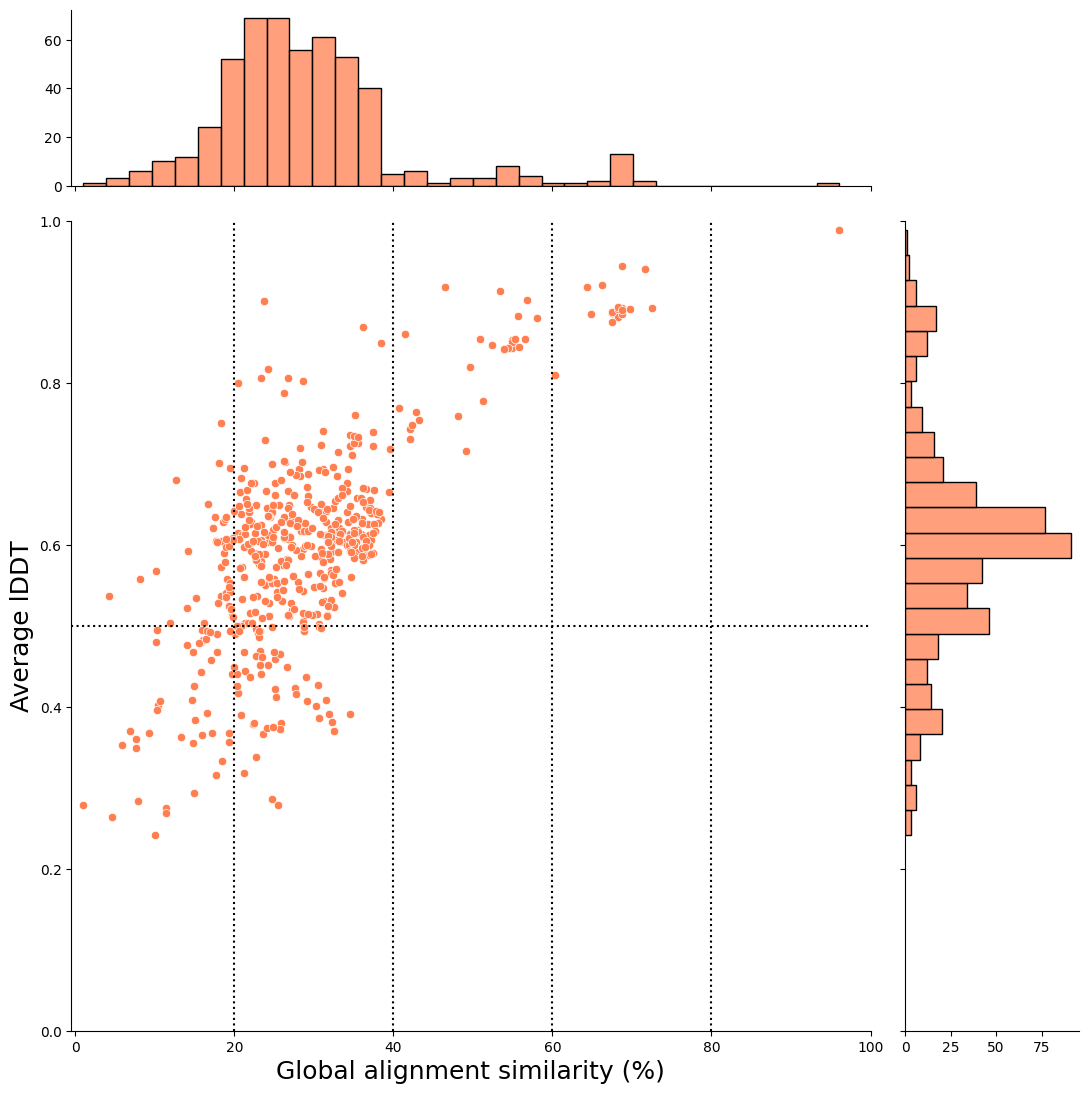

In [19]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

<Figure size 4000x4000 with 0 Axes>

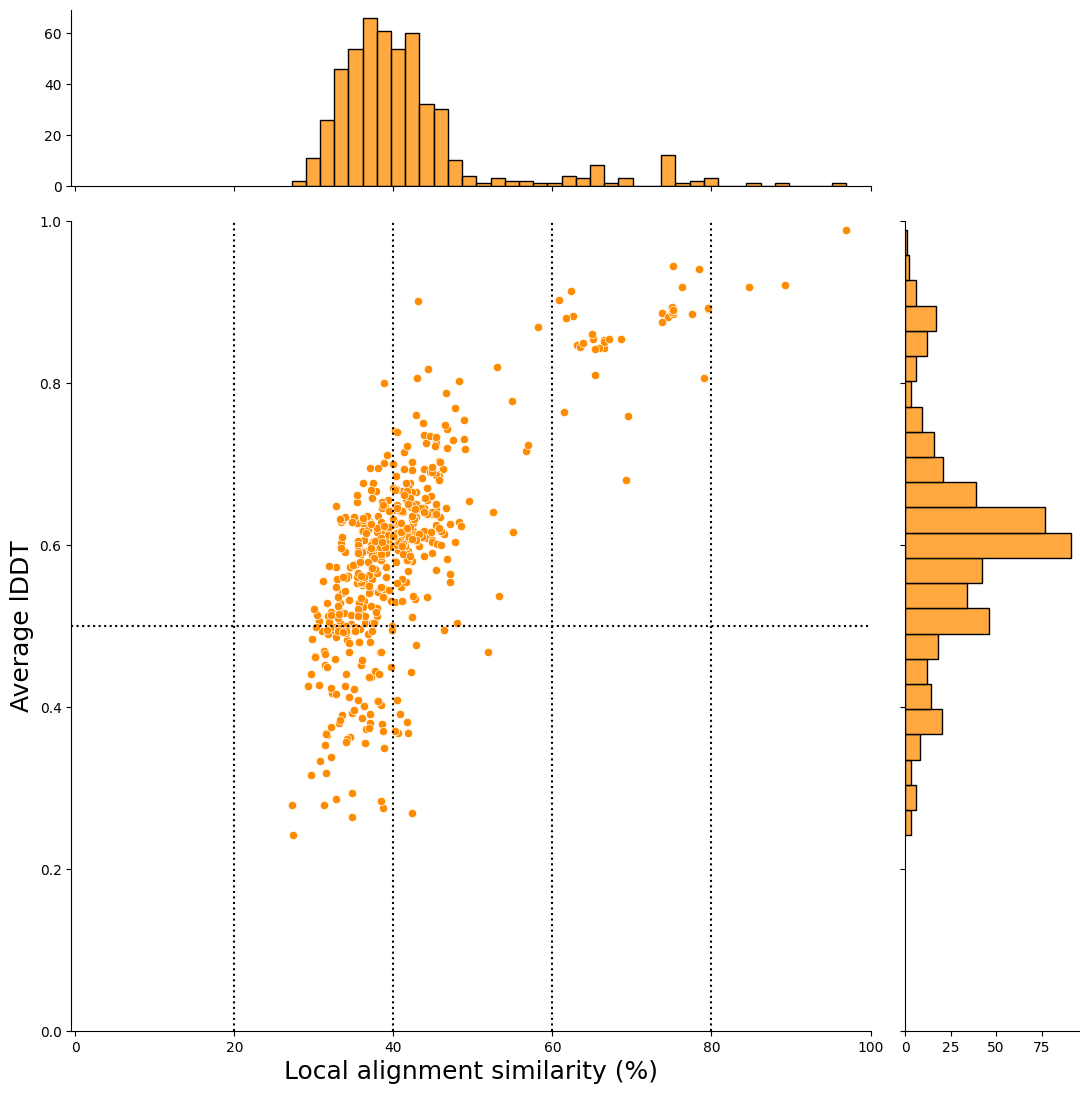

In [20]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_water",
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")

plt.axhline(y=0.5, color="black", linestyle=":")
plt.show()

&nbsp;

&nbsp;
